In [258]:
import yfinance as yf
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from numpy.linalg import norm
from scipy.cluster import hierarchy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier # tree algorithm
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import seaborn as sn
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering

# Question 1

In [286]:


df = yf.download("AMGN HON CRM DOW WBA AAPL NKE GS V UNH CSCO TRV CVX VZ HD MSFT INTC JNJ WMT DIS CAT JPM BA KO MCD AXP IBM MRK MMM PG", start="2021-01-01", end="2022-01-01")

df.drop(columns = ['Volume', 'Low', 'High', 'Open', 'Close'], inplace=True)
df['Adj Close'] = df['Adj Close'].pct_change()


[*********************100%***********************]  30 of 30 completed


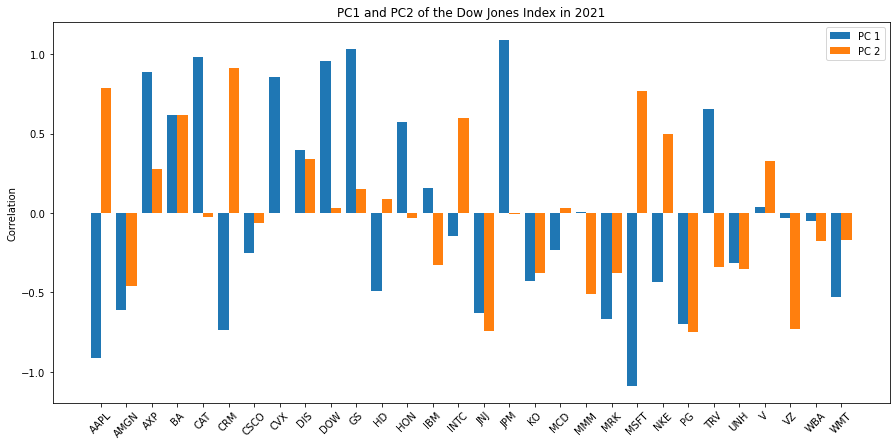

In [318]:
correlation = df.corr()

pca = PCA(n_components=30)
principalComponents = pca.fit_transform(correlation)
cols = []
for i in range(30):
    cols.append('PC ' + str(i+1))
principalDf = pd.DataFrame(data = principalComponents , columns = cols)

# to get the stock name from the tuple
X = df.columns.values.tolist()
for i in range(len(X)):
    X[i] = X[i][1]
Ypc1 = principalDf['PC 1']
Ypc2 = principalDf['PC 2']
  
X_axis = np.arange(len(X))
  
# # # making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

plt.bar(X_axis - 0.2, Ypc1, 0.4, label = 'PC 1')
plt.bar(X_axis + 0.2, Ypc2, 0.4, label = 'PC 2')
  
plt.xticks(X_axis, X, rotation=45)
plt.ylabel("Correlation")
plt.title("PC1 and PC2 of the Dow Jones Index in 2021")
plt.legend()
plt.show()


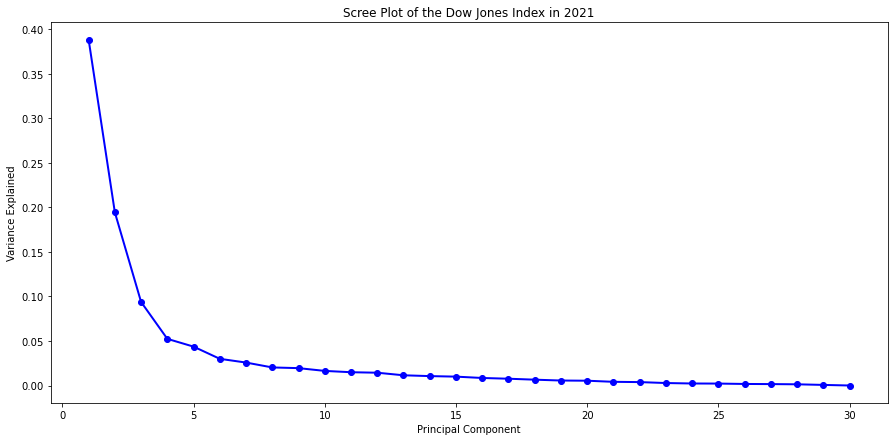

In [319]:

# principalDf
plt.figure(figsize=(15, 7))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of the Dow Jones Index in 2021')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# print(pca.explained_variance_ratio_)




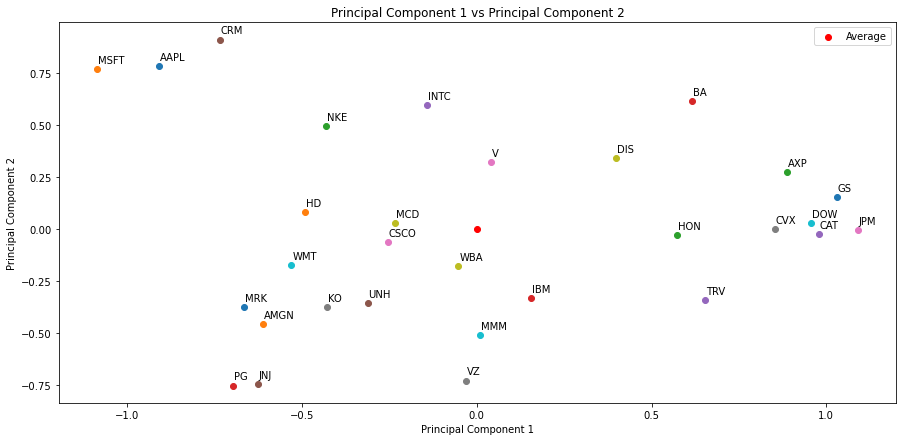

average of PC1: 2.960594732333751e-17
average of PC2 2.8680761469483214e-17


,distance
MSFT,1.856384
AAPL,1.696616
CRM,1.647794
JPM,1.093461
CAT,1.003038
TRV,0.992941
NKE,0.929472
DOW,0.925672
GS,0.876631
CVX,0.850544


In [330]:

plt.figure(figsize=(15, 7))
averagePC1 = Ypc1.mean()
averagePC2 = Ypc2.mean()


euclidian_distance = pd.DataFrame(index=X)
# loop every row and plot 
for x in range(0, len(Ypc1)):
    plt.scatter(Ypc1[x], Ypc2[x])
    # annotate every point with the country code     
    plt.annotate(X[x], (Ypc1[x], Ypc2[x]), xytext=(1, 6), textcoords="offset pixels")
    euclidian_distance.loc[X[x], 'distance'] = norm(Ypc1[x] - Ypc2[x])
    

# plt.scatter(Ypc1, Ypc2)
plt.scatter(averagePC1, averagePC2, c='r', label='Average')
plt.title('Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# averagePC1 = Ypc1.mean()
# averagePC2 = Ypc2.mean()

print("average of PC1: " + str(averagePC1))
print("average of PC2 " + str(averagePC2))

euclidian_distance.sort_values(ascending=False, by='distance')

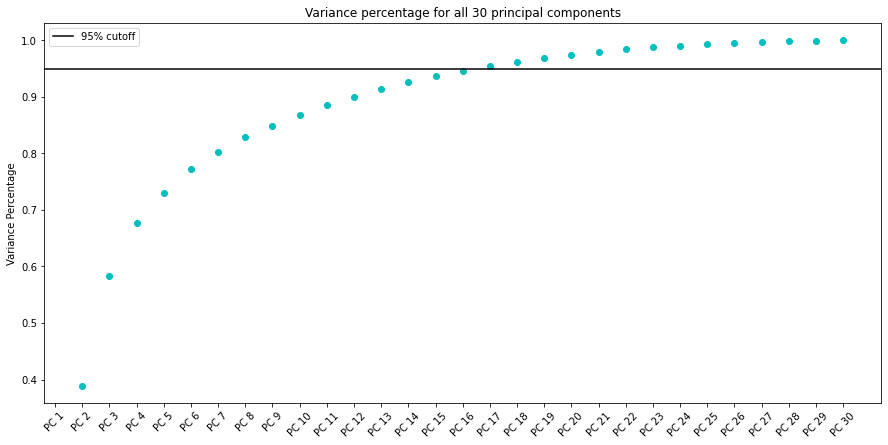

In [313]:

pcas = pca.explained_variance_ratio_
percents = []

for i in range(len(pcas)):
    percent = pcas[i] / sum(pcas)
    percents.append(round(percent,4))

# print(percents)
# print(sum(percents))
# print(sum(percents[0:16]))


plt.figure(figsize=(15, 7))

# loop every row and plot 
for x in range(0, len(percents)):
    plt.scatter(cols[x], sum(percents[0:x]), color='c')

plt.axhline(y=0.95, c='k', label='95% cutoff')
plt.title('Variance percentage for all 30 principal components')
plt.xticks(X_axis, cols, rotation=45)
plt.ylabel('Variance Percentage')
plt.legend()
plt.show()

In [225]:
# df.info()

# Question 2

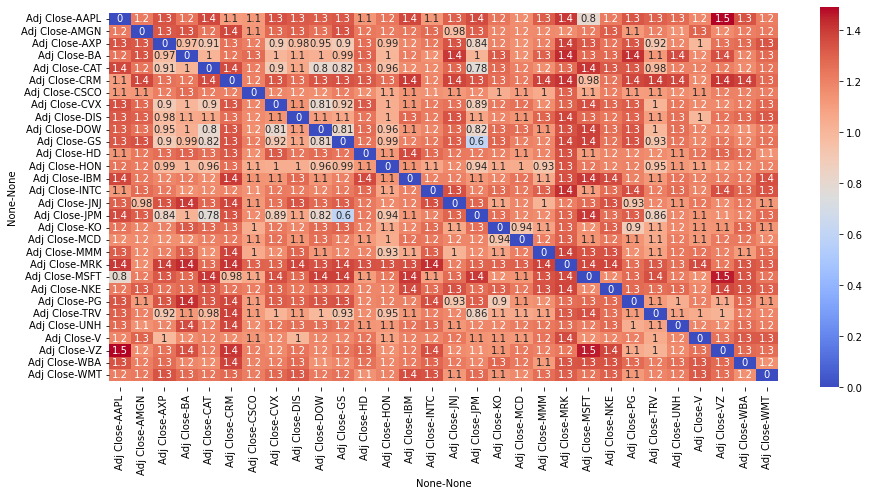

In [275]:

pairwise_distance = pow(2 *(1 - correlation), 1/2)
pairwise_distance

fig, ax = plt.subplots(figsize = (15, 7))
sn.heatmap(pairwise_distance, annot = True, cmap ='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


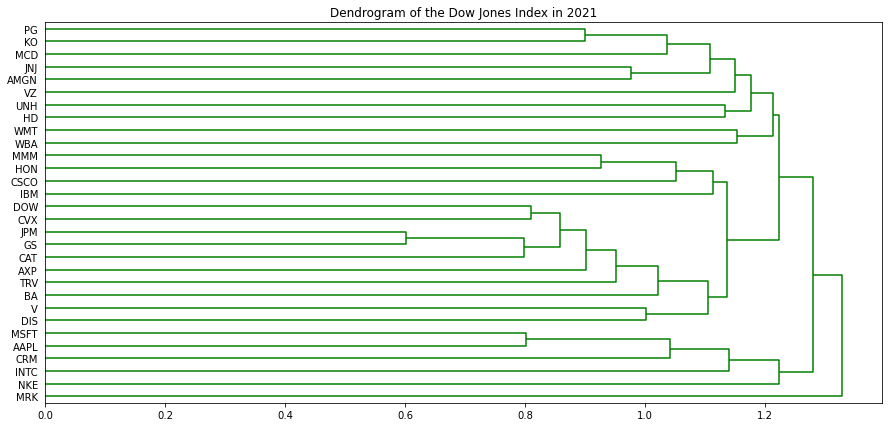

In [280]:

condensed_dist_matrix = squareform(pairwise_distance)
# Plot the hierarchical clustering as a dendrogram.
temp = hierarchy.linkage(condensed_dist_matrix, 'average')
plt.figure(figsize=(15, 7))
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=0.25, orientation='right', labels=X)

plt.title("Dendrogram of the Dow Jones Index in 2021")
plt.show()

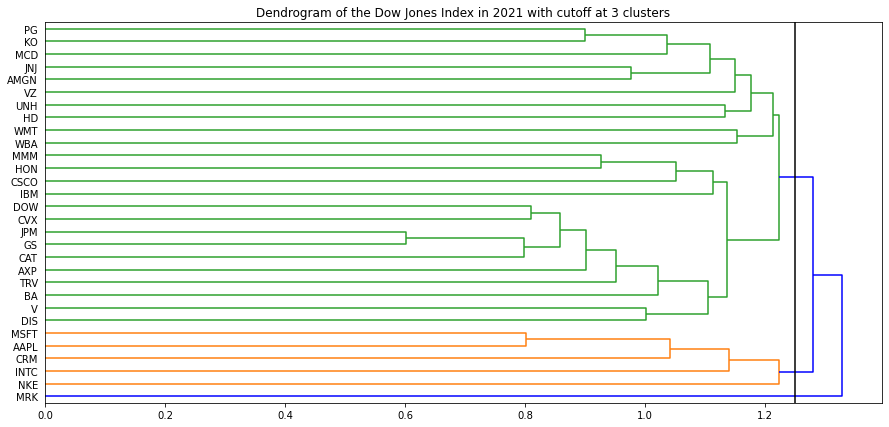

In [281]:

plt.figure(figsize=(15, 7))
dn = hierarchy.dendrogram(
    temp, above_threshold_color="blue", color_threshold=1.25, orientation='right', labels=X)

# Cutting the dendrogram at 2.5 to get 3 clusters
plt.axvline(x=1.25, c='k')
plt.title("Dendrogram of the Dow Jones Index in 2021 with cutoff at 3 clusters")
plt.show()

# Question 3

In [215]:

dfTitanic = pd.read_csv('titanic3.csv')

# choose relevant columns and drop NA values
dfTitanic = dfTitanic[["survived", "sex", "age", "pclass"]].dropna()
dfTitanic = pd.get_dummies(dfTitanic, columns=["sex"], drop_first=True)


X = dfTitanic[['pclass', 'age', 'sex_male']]
y = dfTitanic[['survived']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test






Accuracy: 0.767515923566879


age         0.439529
sex_male    0.391735
pclass      0.168735
dtype: float64

<Figure size 1080x504 with 0 Axes>

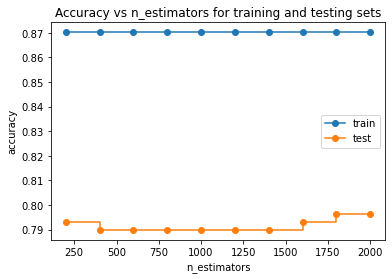

In [209]:



# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

clfs = []
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train.values.ravel())
    clfs.append(clf)
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(15, 7))
fig, ax = plt.subplots()
ax.set_xlabel("n_estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs n_estimators for training and testing sets")
ax.plot(n_estimators, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(n_estimators, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()



In [212]:
print("The number of trees that gives the greatest accuracy is: ",n_estimators[test_scores.index(max(test_scores))])

The number of trees that gives the greatest accuracy is:  1800


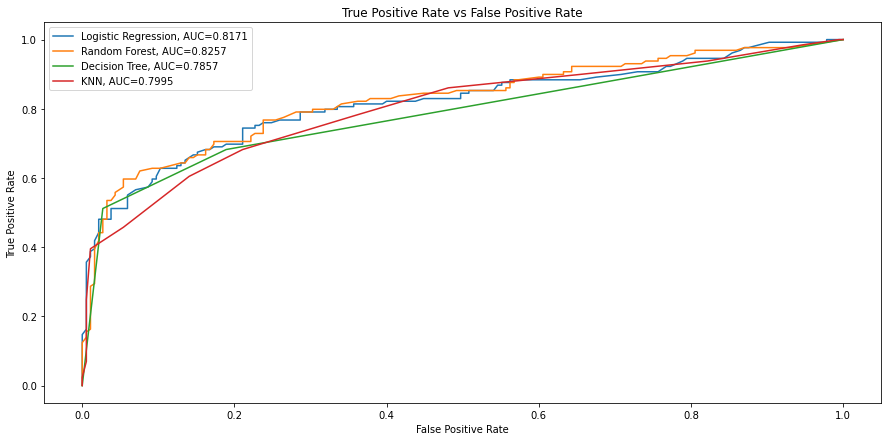

In [220]:

# roc curves 
#set up plotting area
plt.figure(figsize=(15, 7)).clf()

# fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# fit random forest model and plot ROC curve
model = RandomForestClassifier(n_estimators=1800, random_state=42)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit decision tree model and plot ROC curve
model = DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))


#fit KNN neighbors model and plot ROC curve
model = neighbors.KNeighborsClassifier(n_neighbors=16)
gcv = GridSearchCV(estimator=model,param_grid={"metric": ["euclidean", "manhattan", "chebyshev", "minkowski", "hamming", "cosine"]})
gcv.fit(X, y.values.ravel())
model = gcv.best_estimator_
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))


#add legend
plt.legend()
plt.title('True Positive Rate vs False Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Question 4

In [189]:

# read the csv file
dfRedWine = pd.read_csv('winequality-red.csv', sep = ";")

X = dfRedWine.loc [:, dfRedWine.columns != 'quality']
y = dfRedWine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)



<Figure size 1080x504 with 0 Axes>

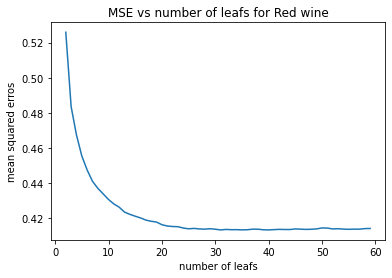

In [190]:

# number of leafs

mses = []
leafs = []
for n in range(2,60):
    clf = RandomForestRegressor(n_estimators=100, random_state = 0, max_leaf_nodes=n)
    clf.fit(X_train, y_train.values.ravel())
    
    mse = -cross_val_score(estimator=clf, X=X,
                                                y=y.values.ravel(),
                                                cv=5, scoring="neg_mean_squared_error").mean()
    
    mses.append(mse)
    leafs.append(n)
    


plt.figure(figsize=(15, 7))
fig, ax = plt.subplots()
ax.set_xlabel("number of leafs")
ax.set_ylabel("mean squared erros")
ax.set_title("MSE vs number of leafs for Red wine")
ax.plot(leafs, mses)
plt.show()


In [192]:
print("The number of leafs with minimum MSE is: ",leafs[mses.index(min(mses))])

The number of leafs with minimum MSE is:  31


<Figure size 1080x504 with 0 Axes>

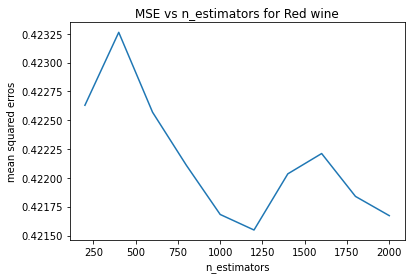

In [193]:
# number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

mses = []
for n in n_estimators:
    clf = RandomForestRegressor(n_estimators=n, random_state = 0)
    clf.fit(X_train, y_train.values.ravel())
    
    mse = -cross_val_score(estimator=clf, X=X,
                                                y=y.values.ravel(),
                                                cv=5, scoring="neg_mean_squared_error").mean()
    
    mses.append(mse)
    


plt.figure(figsize=(15, 7))
fig, ax = plt.subplots()
ax.set_xlabel("n_estimators")
ax.set_ylabel("mean squared erros")
ax.set_title("MSE vs n_estimators for Red wine")
ax.plot(n_estimators, mses)
plt.show()


In [195]:
print("The number of trees with the minimum MSE is: ",n_estimators[mses.index(min(mses))])

The number of trees with the minimum MSE is:  1200


In [199]:
# final regression model with optimized leaf number and tree number

# create regressor object
regressor = RandomForestRegressor(n_estimators = 1200, random_state = 0, max_leaf_nodes=31)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train.values.ravel()) 
regressor.predict(X_test)

# mse = -cross_val_score(estimator=regressor, X=X,
#                         y=y.values.ravel(),
#                         cv=5, scoring="neg_mean_squared_error").mean()

# print(mse)
print()

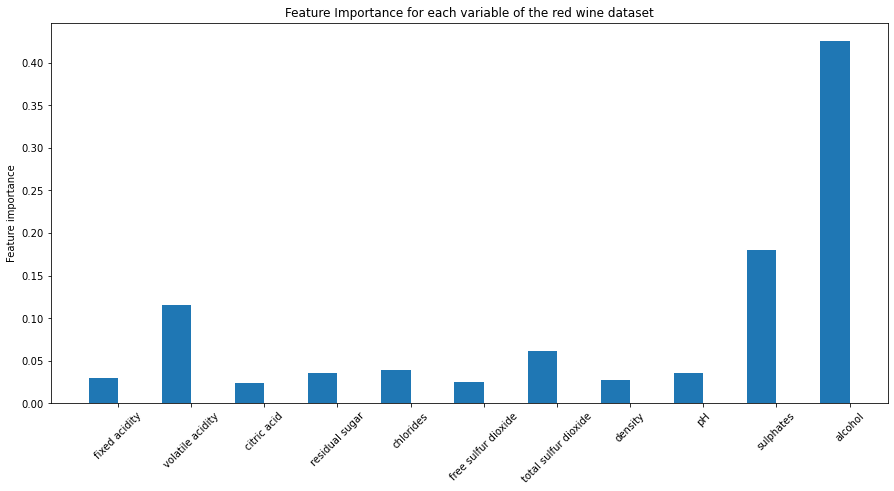

alcohol                 0.425356
sulphates               0.180091
volatile acidity        0.115330
total sulfur dioxide    0.061402
chlorides               0.039049
pH                      0.035962
residual sugar          0.035485
fixed acidity           0.029872
density                 0.027645
free sulfur dioxide     0.025395
citric acid             0.024416
dtype: float64

In [200]:
# bar graph showing the importance of each feature
feature_imp = pd.Series(regressor.feature_importances_,index=list(X.columns)).sort_values(ascending=False)
feature_imp


# to get the stock name from the tuple
X_axis = np.arange(len(X.columns.tolist()))
  
# # # making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

plt.bar(X_axis - 0.2, regressor.feature_importances_.tolist(), 0.4)
  
plt.xticks(X_axis,  list(X.columns), rotation=45)
plt.ylabel("Feature importance")
plt.title("Feature Importance for each variable of the red wine dataset")
# plt.legend()
plt.show()

# regressor.feature_importances_.tolist()
feature_imp

In [132]:
# compare all models

#fit linear regression model and calculate MSE
model = LinearRegression()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
mse = round(mean_squared_error(y_pred, y_test),4)
print("Linear Regression, MSE= "+str(mse))

#fit random forest model and calculate MSE
model = RandomForestRegressor(n_estimators=1200, random_state=0, max_leaf_nodes=31)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
mse = round(mean_squared_error(y_pred, y_test),4)
print("Random Forest Regression, MSE= "+str(mse))

#fit KNN regression model and calculate MSE
knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':np.arange(2, 100, 1)}
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
mse = round(mean_squared_error(y_pred, y_test),4)
print("KNN Regressor, MSE= "+str(mse))



Linear Regression, MSE= 0.3883
Random Forest Regression, MSE= 0.3583
KNN Regressor, MSE= 0.5367


<Figure size 1080x504 with 0 Axes>